In [1]:
proj_path='/content/drive/MyDrive/S4 - 16824 VLR/generative-modeling/gan'

### Git Stuff

### Colab stuff

In [4]:
# one-time data set-up
# #!pip show "clean-fid"
# !cd "$proj_path/$hw_dir" && source "setup_data.sh"
# !ls "/usr/local/lib/python3.7/dist-packages/cleanfid"
# !mkdir "/usr/local/lib/python3.7/dist-packages/cleanfid/stats"
# !cd "$proj_path/$hw_dir/$tasks" && cp cub_clean_custom_na.npz "/usr/local/lib/python3.7/dist-packages/cleanfid/stats/cub_clean_custom_na.npz"

## Notebook

In [6]:
import sys, pathlib
sys.path.append(os.getcwd()+'\gan')
sys.path.append(os.getcwd()+'\vae')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### GAN

In [7]:
from gan.networks import *
from gan.train import *
from gan.q1_5 import compute_discriminator_loss, compute_generator_loss
from networks import Discriminator, Generator

ImportError: cannot import name 'get_fid' from 'utils' (C:\Users\Mo\OneDrive\Notes\CMU\16824 - Visual Learning\github\generative-modeling\./vae\utils.py)

In [ ]:
gen = Generator().cuda().to(memory_format=torch.channels_last)
disc = Discriminator().cuda().to(memory_format=torch.channels_last)
#prefix = "data_gan/"
prefix = "data_wgan_gp/"
os.makedirs(prefix, exist_ok=True)
# TODO 1.3.2: Run this line of code.
train_model(
    gen,
    disc,
    num_iterations=int(3e4),
    batch_size=16,
    prefix=prefix,
    gen_loss_fn=compute_generator_loss,
    disc_loss_fn=compute_discriminator_loss,
    log_period=1000,
    wandb_logging=True
)

Epoch after iters:5159
Epoch after iters:5896
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [05:29<00:00,  1.90it/s]
>>>>>>> remote <modified: >


Iteration 6000 FID: 311.67309753217546
Epoch after iters:6633
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:37<00:00,  2.25it/s]
>>>>>>> remote <modified: >


Iteration 7000 FID: 306.9590930977215
Epoch after iters:7370
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [07:08<00:00,  1.46it/s]
>>>>>>> remote <modified: >


Iteration 8000 FID: 297.3417091453295
Epoch after iters:8107
Epoch after iters:8844
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:58<00:00,  2.09it/s]
>>>>>>> remote <modified: >


Iteration 9000 FID: 290.77342696024664
Epoch after iters:9581
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:37<00:00,  2.25it/s]
>>>>>>> remote <modified: >
<<<<<<< local <removed>


Iteration 10000 FID: 300.0168350554314
Epoch after iters:10318


>>>>>>> remote <modified: >


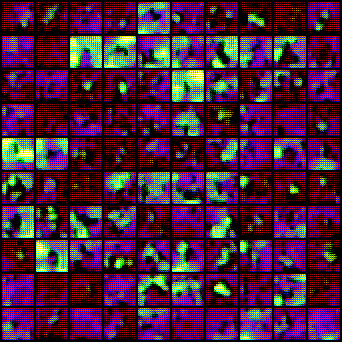

In [7]:
Image.open("data_ls_gan/"+"samples_{}.png".format(1000))

### VAE

In [33]:
from vae.model import AEModel, VAEEncoder, Encoder
from vae.train import vae_loss, ae_loss, main
#from vae.utils import compute_discriminator_loss, compute_generator_loss
#from networks import Discriminator, Generator

In [36]:
input_shape = (3, 32, 32)
x = torch.randn((2,)+input_shape).cuda()
variational = False
model = AEModel(variational=variational, latent_size=128, input_shape = (3, 32, 32)).cuda()
if variational:
    mu, logvar = model.encoder(x)
    print(mu.size(), logvar.size())
    print(vae_loss(model, x))
else:
    mu = model.encoder(x)
    print(ae_loss(model, x))
print(model.decoder(torch.randn(2, 128).cuda()).size())


(tensor(0.9835, device='cuda:0', grad_fn=<MseLossBackward0>), OrderedDict([('recon_loss', tensor(0.9835, device='cuda:0', grad_fn=<MseLossBackward0>))]))
torch.Size([2, 3, 32, 32])


In [43]:
import argparse 
def parse_a2c_arguments():
    # Command-line flags are defined here.
    parser = argparse.ArgumentParser()
    parser.add_argument('--latent_size', dest='latent_size', type=int,
                        default=1024, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--num_epochs', dest='num_epochs', type=int,
                        default=20, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--loss_mode', dest='loss_mode', type=str,
                        default='ae', help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--log_dir', dest='log_dir', type=str,
                        default='ae_latent1024', help="directory")
    # ['ae_latent1024','vae_latent1024', 'vae_latent1024_beta_constant0.8','vae_latent1024_beta_linear1']
    parser.add_argument('--beta_mode', dest='beta_mode', type=str,
                        default='constant', help="directorye")   
    # ['constant', 'linear']
    parser.add_argument('--target_beta_val', dest='target_beta_val', type=float,
                        default=0.8, help="final beta")   # 
    # [0.8. 1]
    return parser.parse_known_args()[0]  #parser.parse_args()
args = parse_a2c_arguments()
print(args.__dict__)

{'latent_size': 1024, 'num_epochs': 20, 'loss_mode': 'ae', 'log_dir': 'ae_latent1024', 'beta_mode': 'constant', 'target_beta_val': 0.8}


Files already downloaded and verified
input shape/latent size:((3, 32, 32), 1024)
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
4 {'recon_loss': 0.15038897}
4 {'recon_loss': 0.14698035}
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
9 {'recon_loss': 0.14654456}
9 {'recon_loss': 0.14376149}
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
14 {'recon_loss': 0.14531237}
14 {'recon_loss': 0.14251962}
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
19 {'recon_loss': 0.14441535}
19 {'recon_loss': 0.14160392}


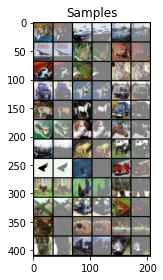

In [46]:
main(**args.__dict__)